In [2]:
import zipfile
import os

zip_path = "Dataset.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.
Class names: ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


<ipython-input-3-674dcfb0e4ba>:49: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.3527 - loss: 1.7627 - val_accuracy: 0.7232 - val_loss: 0.8350
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.6147 - loss: 1.1011 - val_accuracy: 0.7540 - val_loss: 0.7182
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.6475 - loss: 1.0149 - val_accuracy: 0.7257 - val_loss: 0.7688
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.6719 - loss: 0.9183 - val_accuracy: 0.7540 - val_loss: 0.6966
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.6732 - loss: 0.9400 - val_accuracy: 0.7798 - val_loss: 0.6375
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.6810 - loss: 0.8867 - val_accuracy: 0.7700 - val_loss: 0.6409
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.7041 - loss: 0.8461 - val_accuracy: 0.7577 - val_loss: 0.6625
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/

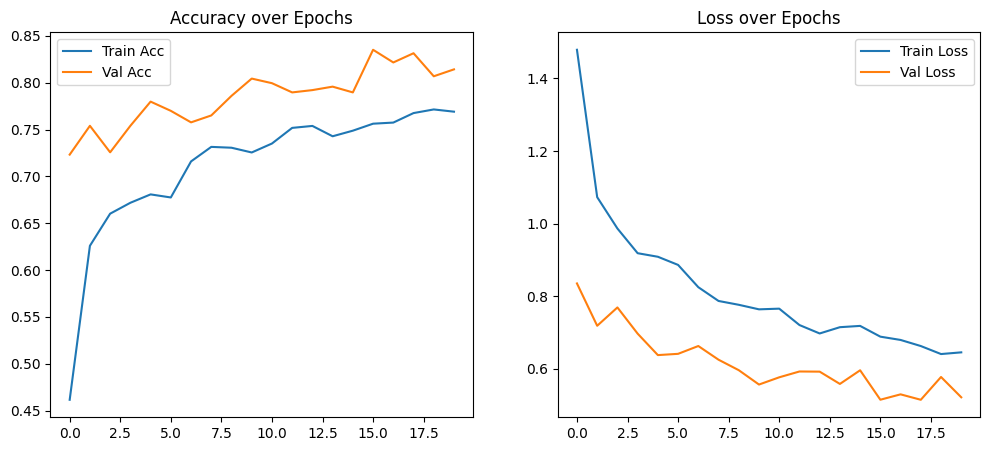

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# Parameters
img_height, img_width = 180, 180
batch_size = 32
train_dir = "Dataset/train"
val_dir = "Dataset/test"

# 1. Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    seed=123,
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    seed=123,
    label_mode='categorical'
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Class names:", class_names)

# 2. Optimize performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# 3. Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# 4. Base model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # freeze it for now

# 5. Model architecture
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # dynamic class count
])

# 6. Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 7. Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

# 8. Evaluate
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy:.2f}")

# 9. Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<Figure size 800x600 with 0 Axes>

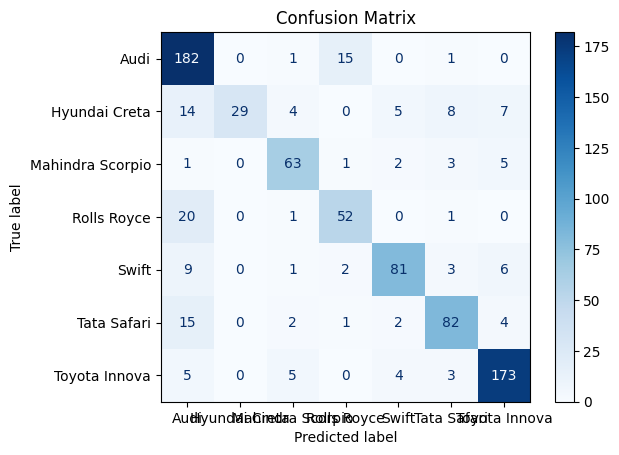

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Get true labels and predicted labels
y_true = []
y_pred = []

# Loop through validation dataset
for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [12]:
import tensorflow as tf
import numpy as np
from PIL import Image
from io import BytesIO

img = Image.open("ia_test_5.jpeg").convert("RGB")

img = img.resize((img_width, img_height))  # Resize to model input size
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)  # Create batch dimension
img_array = img_array / 255.0  # Normalize

# Predict
predictions = model.predict(img_array)

print(predictions)


predicted_class = class_names[np.argmax(predictions[0])]
confidence = 100 * np.max(predictions[0])

print(f"Predicted class: {predicted_class} ({confidence:.2f}% confidence)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
[[0.08324053 0.01324035 0.00978599 0.29525054 0.0026067  0.49463046
  0.1012454 ]]
Predicted class: Tata Safari (49.46% confidence)
